In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def valuation(Q_image, Q_i0_image, Q_user, R_i, tau_2, k_values):
    k0, k1, k2, k3, k4, k5, k6, k7, k8 = k_values
    val = [0.0]*len(Q_image)

    condition_1 = (Q_image + Q_user) / R_i <= tau_2
    condition_2 =  (Q_user / R_i) <= tau_2
    condition_3 = (Q_image / R_i) <= tau_2
    # print('\n', condition_1,'\n', condition_2, '\n', condition_3)
    val_1, val_2, val_3, val_4 = [], [], [], []
    for i in range(len(Q_image)):
        if condition_1[i]:
            val[i] = k0 * k1 ** (tau_2 - (Q_image[i] + Q_user[i]) / R_i[i]) + k2 * np.log(1 + Q_image[i] / Q_i0_image[i]) + k3
            val_1.append(val[i])
        elif condition_2[i]:
            val[i] = k0 * k1 ** (tau_2 - Q_user[i] / R_i[i]) + k4 * np.log(1 + Q_user[i] / (Q_user[i] + Q_i0_image[i])) + k5
            val_2.append(val[i])
        elif condition_3[i]:
            val[i] = k6 * k1**(tau_2 - Q_image[i] / R_i[i]) + k7 * np.log(1 + Q_image[i] / Q_i0_image[i]) + k8
            val_3.append(val[i])
        else:
            val[i] = 0.0
            val_4.append(0)


    plt.plot(val_1, color = 'red',label = "Case 1")
    plt.plot(val_2, color = 'green',label = "Case 2")
    plt.plot(val_3, color = 'blue', label = "Case 3")
    plt.plot(val_4, color = 'black', label = "Case 4")
    plt.title("Valuation of the time slot to UAV i ")
    leg = plt.legend(loc='best')
    plt.show()

    return val


def create_dataset(shape, num_UAV=3):
    N = shape[0]*shape[1]
    # Example usage:
    # Q_image = 8*[3592002, 863407, 279507, 122691, 38883, 30747]
    # Q_0 = [23368, 26944, 24736, 23704, 22880, 22608]
    # Q_i = [2360, 840, 2136, 1016, 1016, 224]

    Q_0 = [i for i in range(20000, 25000)]
    Q_i = [random.randint(200, 2000) for i in range(20000, 25000)]
    q_0, q_i = [], []
    for i in range(shape[0]):
        for j in range(shape[1]):
            inds = random.sample(range(len(Q_0)), random.randint(1, 3))
            q_0.append(sum([Q_0[_] for _ in inds]))
            q_i.append(sum([Q_i[_] for _ in inds]))
    Q_image_0 = np.array(q_0, dtype=float)
    Q_image = np.array(q_i, dtype=float)
    t_1 = 0.6
    data_rate = {2: [1012, 1725],
                 3: [1491, 1951],
                 4: [1503, 2023]}
    # Q_user = np.array([random.randint(100, 180)*10*t_1 for i in range(N)], dtype=float)
    Q_user = np.array([random.randint(data_rate[num_UAV][0],data_rate[num_UAV][1] ) * 10*t_1 for i in range(N)], dtype=float)
    R_i = []
    for i in range(N):
        W_B = 12 * 15 * 2**2 * 10^3
        p_i = 0.15
        sigma_2 = 10**(-17)
        d_i = random.randint(20, 300)
        h_i = random.random()
        r_i = W_B * np.log2(1 + (p_i*h_i*d_i**-2) / (W_B*sigma_2))
        R_i.append(r_i)

    R_i = np.array(R_i, dtype=float)
    k_values = np.array([0.6, 0.6, 3.9, 1.0, 1.9, 0.5, 0.3, 4.9, 0.4])
    tau_2 = 0.045

    valuation_result = valuation(Q_image, Q_image_0, Q_user, R_i, tau_2, k_values)

    R_i.sort()
    plt.plot(R_i / 10**3)
    plt.title("Data rate achieved by UAV i")
    plt.ylabel('(Kb/s)')
    plt.show()
    return np.array(valuation_result).reshape(shape)

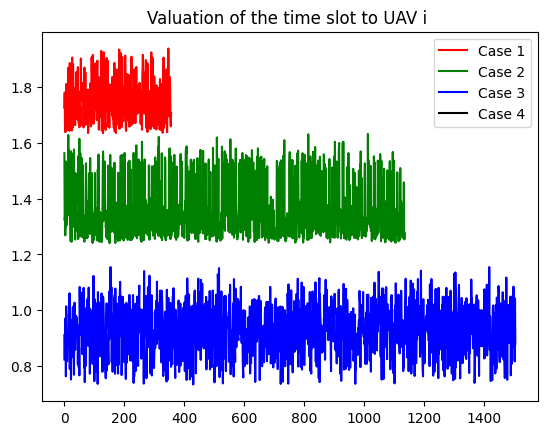

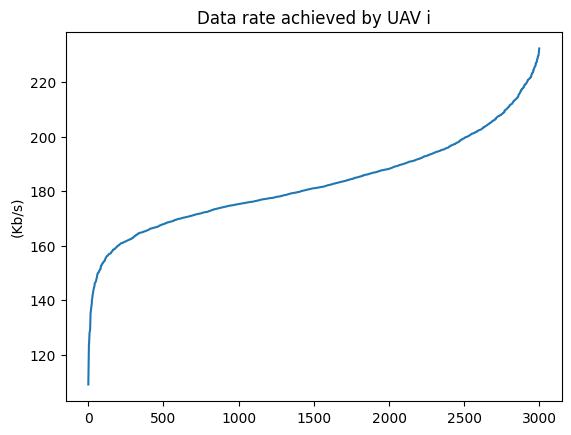

In [3]:
data = create_dataset(shape=[1000, 3], num_UAV=2)

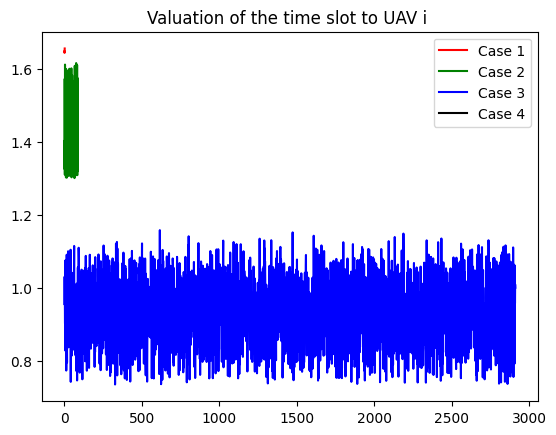

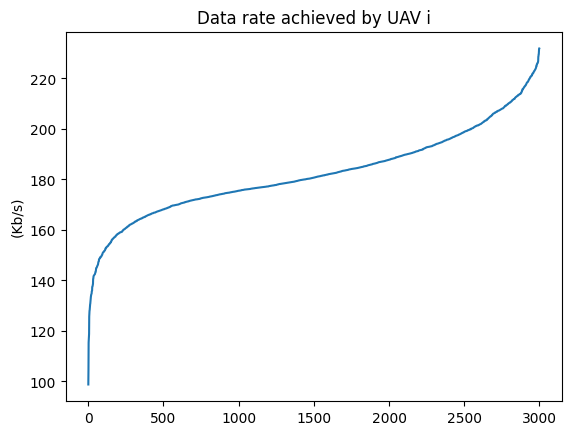

In [4]:
data = create_dataset(shape=[1000, 3], num_UAV=3)

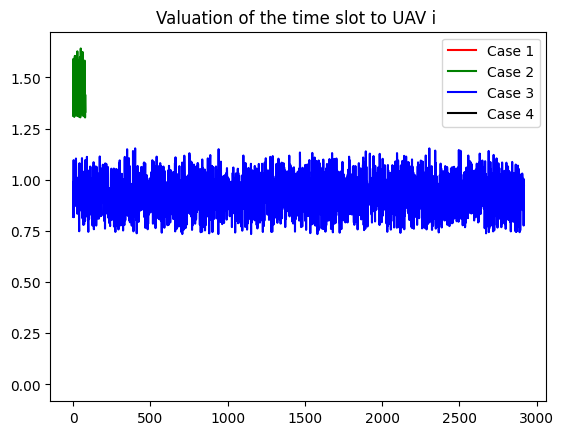

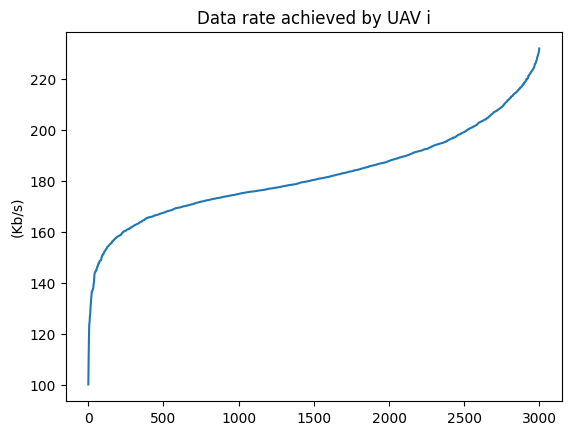

In [5]:
data = create_dataset(shape=[1000, 3], num_UAV=4)

In [6]:
df = pd.DataFrame(data)
print('valuation: ')
print(df.describe())

valuation: 
                 0            1            2
count  1000.000000  1000.000000  1000.000000
mean      0.936118     0.943085     0.943846
std       0.112277     0.126875     0.117567
min       0.734672     0.000000     0.734375
25%       0.869844     0.865530     0.871133
50%       0.927637     0.933443     0.937162
75%       0.991900     1.000006     0.999374
max       1.623679     1.641026     1.627139


In [7]:
print(data.shape)

(1000, 3)


In [8]:
#Save data to numpy
np.save('data.npy', data)